## Критерии неоднородности

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
import numpy as np

from mutils import *

In [2]:
def gini(p):
    return 1 - p ** 2 - (1 - p) ** 2

def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

def error(p):
    return 1 - np.max([p, 1 - p])

In [3]:
x = np.arange(0., 1., .01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e / 2 if e else None for e in ent]
gi = [gini(p) for p in x]
err = [error(p) for p in x]

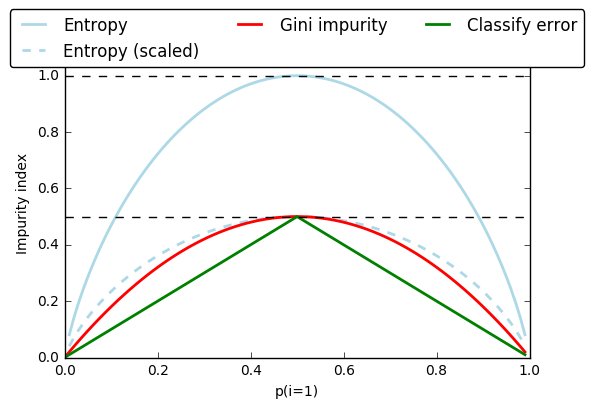

In [4]:
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gi, err],
                         ['Entropy', 'Entropy (scaled)', 'Gini impurity', 'Classify error'],
                         ['-', '--', '-', '-'],
                         ['lightblue', 'lightblue', 'red', 'green']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(.5, 1.15),
          ncol=3, fancybox=True, shadow=False)
ax.axhline(y=.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1., linewidth=1, color='k', linestyle='--')
plt.ylim([0., 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity index')
plt.show()

##  Деревья решений

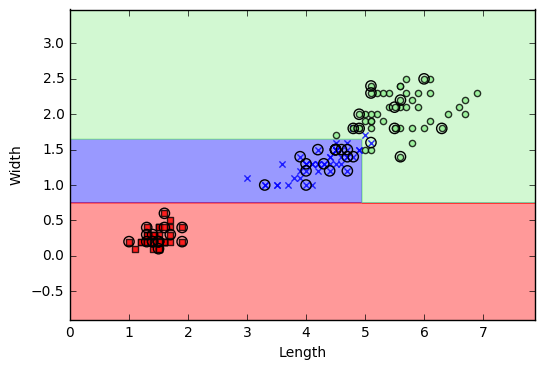

In [5]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,
                      clf=tree, test_idx=range(105, 150))
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

In [19]:
export_graphviz(tree, out_file='./tree.dot', 
                feature_names=['petal length', 'petal_width'])

In [21]:
!dot -Tpng tree.dot -o tree.png

<img src='./tree.png'>

## Случайный лес

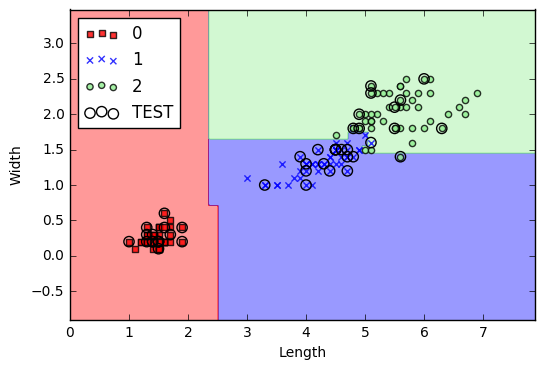

In [24]:
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,
                      clf=forest, test_idx=range(105, 150))
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend(loc='upper left')
plt.show()